In [93]:
#1.Import the dataset and explore basic info (nulls, data types).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [94]:
data  = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
data = data.drop(['PassengerId','Name','Ticket'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [97]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [98]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [99]:
data_mean = data.copy()
data_mean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [100]:
# 2.Handle missing values using mean/median/imputation
#using mean
data_mean['Age'].fillna(data_mean['Age'].mean(), inplace=True)
data_mean['Cabin'].fillna(data_mean['Cabin'].mode()[0], inplace=True)
data_mean['Embarked'].fillna(data_mean['Embarked'].mode()[0], inplace=True)
data_mean.head()
data_mean.isnull().sum()


/tmp/ipython-input-3439101672.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_mean['Age'].fillna(data_mean['Age'].mean(), inplace=True)
/tmp/ipython-input-3439101672.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [101]:
#using median
data_median = data.copy()
data_median['Age'].fillna(data_median['Age'].median(), inplace=True)
data_median['Cabin'].fillna(data_median['Cabin'].mode()[0], inplace=True)
data_median['Embarked'].fillna(data_median['Embarked'].mode()[0], inplace=True)
data_median.head()
data_median.isnull().sum()


/tmp/ipython-input-3706052738.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_median['Age'].fillna(data_median['Age'].median(), inplace=True)
/tmp/ipython-input-3706052738.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [102]:
#using imputation
data_imputation = data_mean.copy()

mean_imputer = SimpleImputer(strategy='mean') #numerical data
mode_imputer = SimpleImputer(strategy='most_frequent') #categorical data

data_imputation[['Age']] = mean_imputer.fit_transform(data_imputation[['Age']])
data_imputation[['Cabin','Embarked']] = mode_imputer.fit_transform(data_imputation[['Cabin','Embarked']])
data_imputation.head()
data_imputation.isnull().sum()




,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [103]:
# 3.Convert categorical features into numerical using encoding.
data_encoded = data_imputation.copy()
le = LabelEncoder()
data_encoded['Sex'] = le.fit_transform(data_encoded['Sex'])
data_encoded['Embarked'] = le.fit_transform(data_encoded['Embarked'])
data_encoded['Cabin'] = le.fit_transform(data_encoded['Cabin'])
data_encoded.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,47,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,47,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,47,2


In [104]:
# 4.Normalize/standardize the numerical features.
#Normalize
data_scaled  = data_encoded.copy()

num_col = ['Age', 'SibSp', 'Parch', 'Fare']
scaler  = MinMaxScaler()
data_scaled[num_col] = scaler.fit_transform(data_scaled[num_col])
data_scaled.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,0.271174,0.125,0.0,0.014151,47,2
1,1,1,0,0.472229,0.125,0.0,0.139136,81,0
2,1,3,0,0.321438,0.000,0.0,0.015469,47,2
3,1,1,0,0.434531,0.125,0.0,0.103644,55,2
4,0,3,1,0.434531,0.000,0.0,0.015713,47,2


In [105]:
#StandardScaler

data_StandardScaler = data.copy()

numerical_col = ['Age', 'SibSp', 'Parch', 'Fare']
scaler  = StandardScaler()
data_StandardScaler[numerical_col] = scaler.fit_transform(data_StandardScaler[numerical_col])
data_StandardScaler.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,-0.530377,0.432793,-0.473674,-0.502445,NaN,S
1,1,1,female,0.571831,0.432793,-0.473674,0.786845,C85,C
2,1,3,female,-0.254825,-0.474545,-0.473674,-0.488854,NaN,S
3,1,1,female,0.365167,0.432793,-0.473674,0.420730,C123,S
4,0,3,male,0.365167,-0.474545,-0.473674,-0.486337,NaN,S


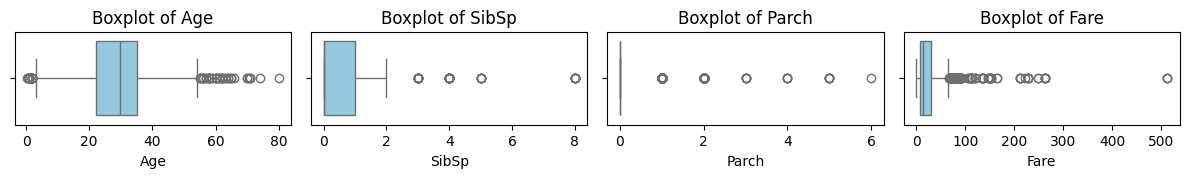

In [106]:
# 5.Visualize outliers using boxplots and remove them.
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sb.boxplot(data=data_encoded, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [107]:
data_no_outliers = data_encoded.copy()

for col in num_cols:
    Q1 = data_no_outliers[col].quantile(0.25)
    Q3 = data_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter rows within range
    data_no_outliers = data_no_outliers[
        (data_no_outliers[col] >= lower) & (data_no_outliers[col] <= upper)]

# Check result
print("Shape before:", data_encoded.shape)
print("Shape after removing outliers:", data_no_outliers.shape)


Shape before: (891, 9)
Shape after removing outliers: (561, 9)


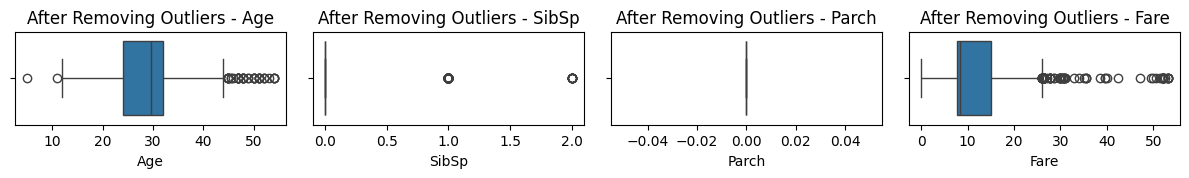

In [108]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sb.boxplot(x=data_no_outliers[col])
    plt.title(f'After Removing Outliers - {col}')
plt.tight_layout()
plt.show()
